In [ ]:
import sys
import os
import importlib
import numpy
sys.path.append(os.path.abspath('../')) 

%reload_ext autoreload
%autoreload 2
import src.eclipsing_binary.core
from src.eclipsing_binary.config import get_paths
from src.eclipsing_binary.utils import read_data
from src.eclipsing_binary.utils import gaia_cross_match

"Important:  Gaia archive will be intermittently unavailable due to scheduled maintenance on 10-12-2024 from 08:00 to 10:00 (CET)"


In [98]:
paths = get_paths()

In [99]:
binaries = read_data(paths)

In [131]:
selected_binaries = [
    binary for binary in binaries 
    if binary.check_parameters(I_magnitude=(15, 16))
]

In [132]:
#binary=binaries[500]
binary=selected_binaries[0]
binary.check_status()

object_name: OGLE-SMC-ECL-0024
I_magnitude: 15.994
V_magnitude: 16.679
period_days: 0.385384
epoch_of_minimum: 7000.036
main_eclipse_dip: 0.488
second_eclipse_dip: 0.488
E(V-I)peak: 0.057
obj_type: C
RA: 00:23:24.08
DEC: -73:31:55.6
extinction: Dictionary with keys: E(V-I), -sigma1, +sigma2, E(V-I)sfd


In [133]:
binary.light_curves()

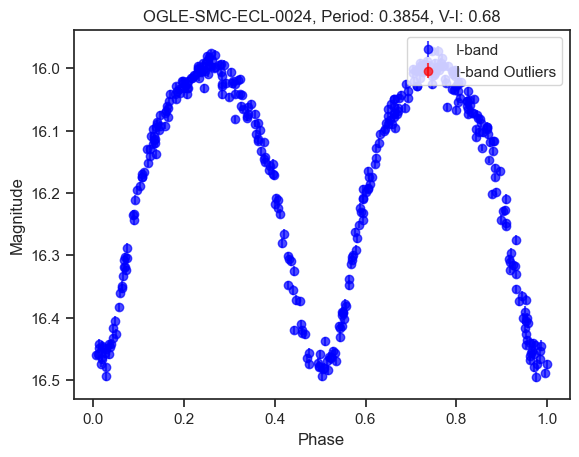

In [134]:
binary.plot_light_curves(band= 'I')

In [135]:
binary.smooth_light_curve()

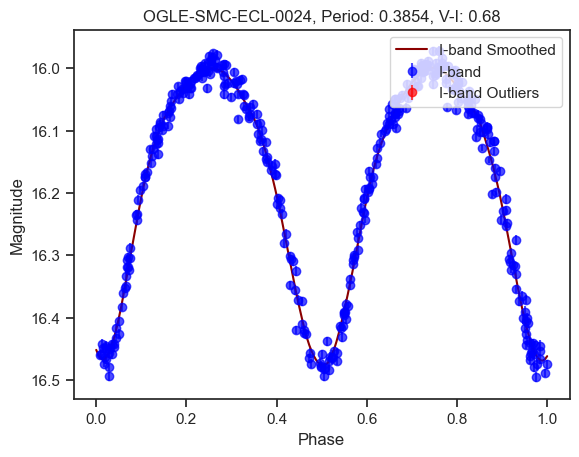

In [136]:
binary.plot_light_curves(band='I',plot_smooth=True)

In [86]:
filename = paths['w_dir']+"notebooks/smc_coordinate.txt"  # Replace with your file name
crossmatch_table = gaia_cross_match(binaries, table_name='ogle_smc', save_to_file=True)

INFO: Login to gaia TAP server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to gaia data server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
Table 'user_mgabdeev.ogle_smc' already exists. Deleting...
INFO: Table 'ogle_smc' deleted. [astroquery.utils.tap.core]
INFO: Sending pytable. [astroquery.utils.tap.core]
INFO: Uploaded table 'ogle_smc'. [astroquery.utils.tap.core]
INFO: Table 'user_mgabdeev.ogle_smc' updated. [astroquery.utils.tap.core]
Launched query: 'SELECT crossmatch_positional('user_mgabdeev','ogle_smc','gaiadr3','gaia_source',1, 'xmatch') FROM dual;'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
Content-type = application/x-www-form-urlencoded
303 303
[('Date', 'Mon, 09 Dec 2024 14:59:54 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips mod_jk/1.2.43')